In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:

# For this example, let's use the stock market dataset of Apple Inc. (AAPL)
url = 'https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=0&period2=9999999999&interval=1d&events=history'
df = pd.read_csv(url)
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099192  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094017  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087117  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089273   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091861   73449600


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.isnull().sum())
df.dropna(inplace=True)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


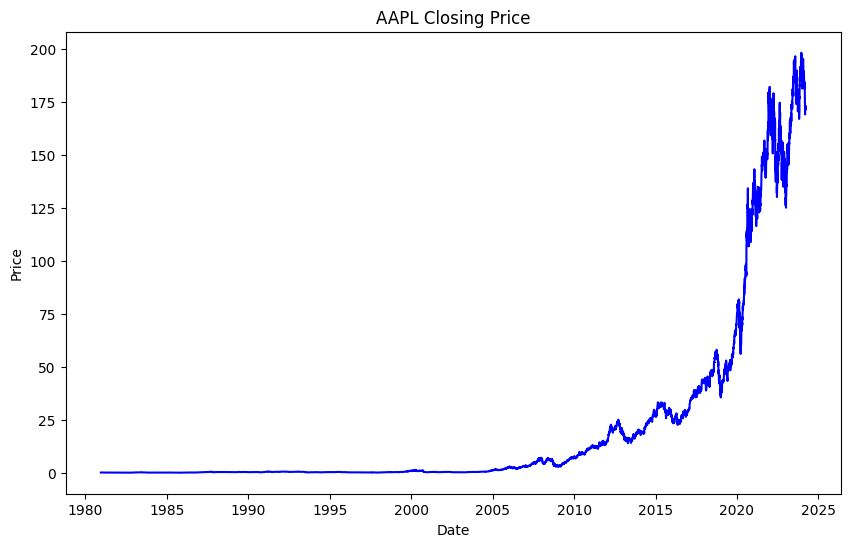

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], color='blue')
plt.title('AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:

train_data = df[:'2023-12-31']
test_data = df['2024-01-01':]


# Create and fit ARIMA model

In [ ]:
# p = 1
# d = 3
# q = 4
model = sm.tsa.ARIMA(train_data['Close'], order=(1, 2, 3))
arima_model = model.fit()
print(arima_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                10853
Model:                 ARIMA(1, 2, 3)   Log Likelihood              -13472.973
Date:                Mon, 18 Mar 2024   AIC                          26955.945
Time:                        06:09:46   BIC                          26992.405
Sample:                             0   HQIC                         26968.237
                              - 10853                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8802      0.011    -82.803      0.000      -0.901      -0.859
ma.L1         -0.1537      0.011    -14.050      0.000      -0.175      -0.132
ma.L2         -0.9054      0.010    -91.342      0.0

In [ ]:

predictions = arima_model.forecast(steps=len(test_data))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


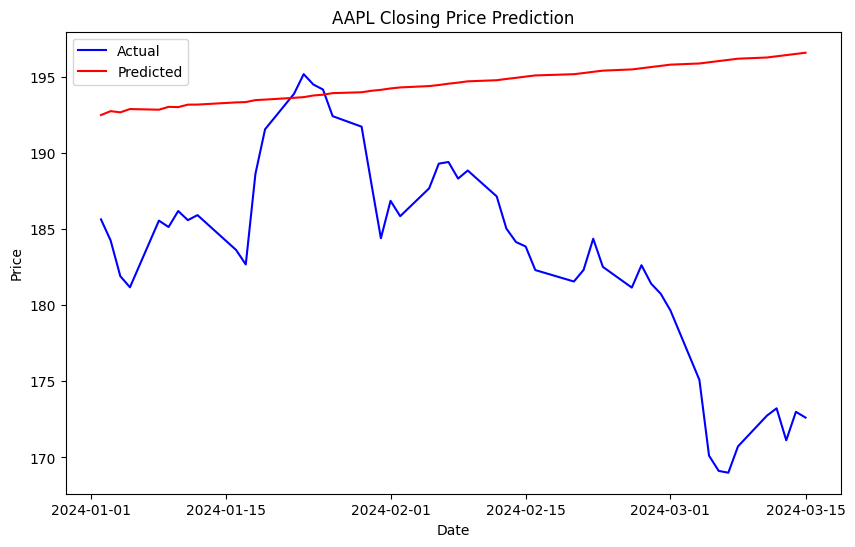

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Close'], color='blue', label='Actual')
plt.plot(test_data.index, predictions, color='red', label='Predicted')
plt.title('AAPL Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:

mae = mean_absolute_error(test_data['Close'], predictions)
mse = mean_squared_error(test_data['Close'], predictions)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 9.52517143035479
Mean Squared Error (MSE): 131.96149581611792
Root Mean Squared Error (RMSE): 11.487449491341318
